In [1]:
import pickle

In [2]:
from matplotlib import pyplot as plt

In [3]:
import pickle

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
p = pickle.load(open('save.p', 'rb'))
p.keys()

dict_keys(['scan_2nd_1702589220_ch0.zip', 'scan_2nd_1702589220_ch1.zip', 'scan_2nd_1702589220_ch2.zip'])

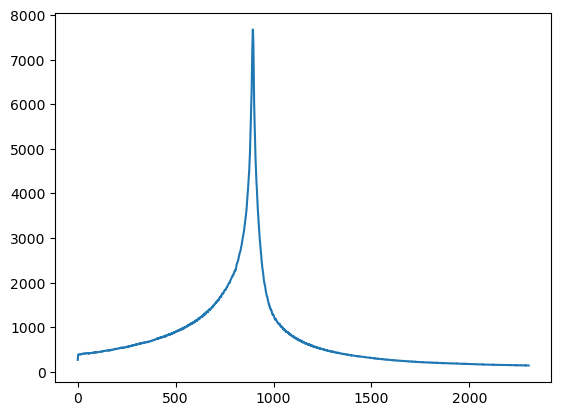

In [7]:
s = p[list(p.keys())[0]]
s = s[list(s.keys())[100]]

plt.plot(s)

In [8]:
x_vals = [i for i in range(0, 2**16, 1024 // 4)]

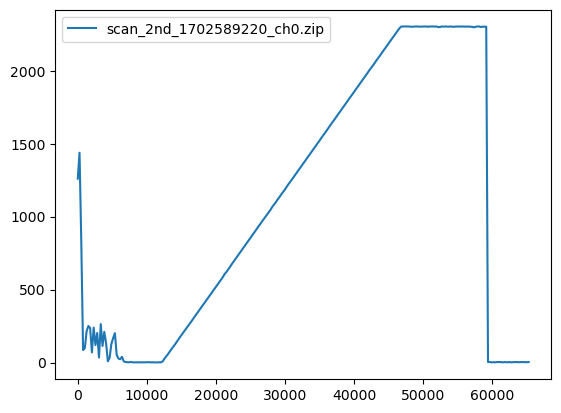

In [9]:
for k in filter(lambda x: '_ch0' in x, p.keys()):
    plt.plot(
        x_vals,
        list(
        np.argmax( p[k][i] ) for i in
        sorted(p[k].keys())
    ), label=k)
    
plt.legend()

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

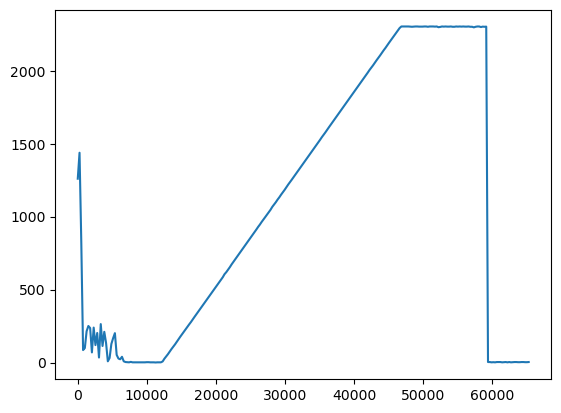

In [11]:
for k in filter(lambda x: '_ch0' in x, p.keys()):
    plt.plot(
        x_vals,
        list(
        np.argmax( p[k][i] ) for i in
        sorted(p[k].keys())
    ), label=k)

[-6.45397069e-13  5.39631593e-08  6.53006446e-02 -8.02151827e+02]


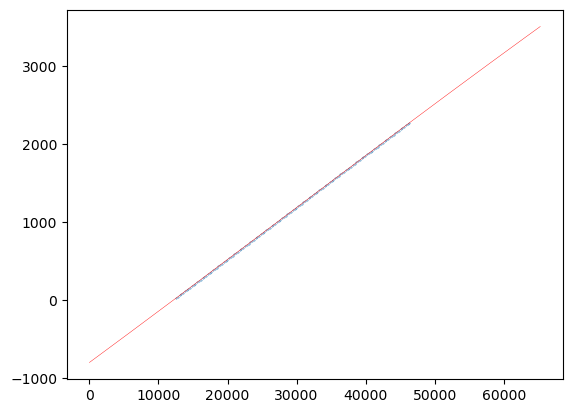

In [12]:
d = []
for k in filter(lambda x: '_ch0' in x, p.keys()):
    for x,i in zip(x_vals,sorted(p[k].keys())):
        d.append( (x, np.argmax(p[k][i]) ) )
        
minval, maxval = 12500, 46500
        
d = list(filter(lambda x: minval < x[0] < maxval, d))

f0 = np.polyfit( [i[0] for i in d], [i[1] for i in d], 3 )
print(f0)

plt.scatter( [i[0] for i in d], [i[1] for i in d], s=.1 )
plt.plot( x_vals, [np.polyval(f0, i) for i in x_vals], c='r', lw=.3)

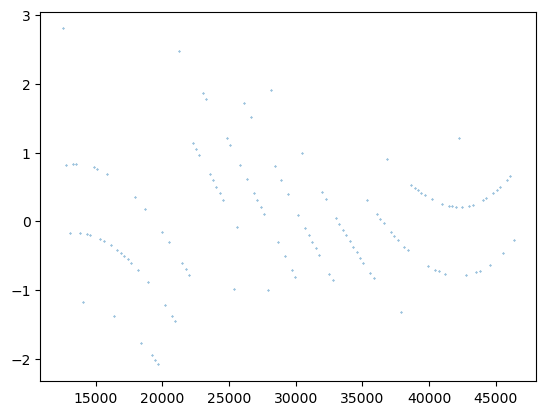

In [13]:
toplot = []

for v in x_vals:
    fvs = [i[1] for i in filter(lambda x: x[0]==v, d)]
    if len(fvs):
        toplot.append( (v,np.mean( fvs ) - np.polyval(f0, v)) )
        
plt.scatter( [i[0] for i in toplot], [i[1] for i in toplot], s=.1 )
        

/home/loganaw/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


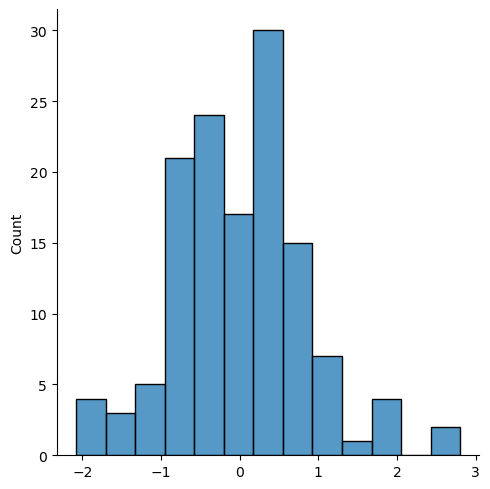

In [14]:
sns.displot( [i[1] for i in toplot] )

[ 2.69071875e-13 -1.84082144e-08 -6.75049148e-02  3.29523089e+03]


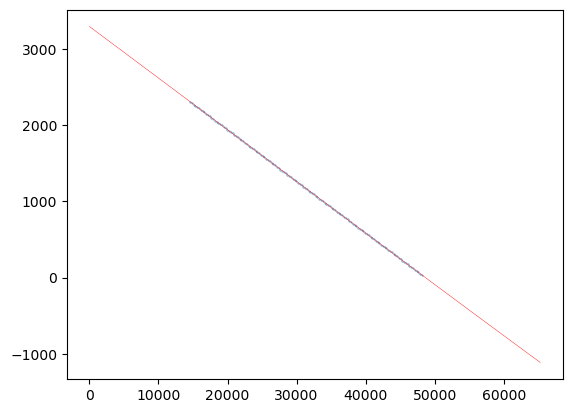

In [15]:
d = []
for k in filter(lambda x: '_ch1' in x, p.keys()):
    for x,i in zip(x_vals,sorted(p[k].keys())):
        d.append( (x, np.argmax(p[k][i]) ) )
        
minval, maxval = 14500, 48250
        
d = list(filter(lambda x: minval < x[0] < maxval, d))

f1 = np.polyfit( [i[0] for i in d], [i[1] for i in d], 3 )
print(f1)

plt.scatter( [i[0] for i in d], [i[1] for i in d], s=.1 )
plt.plot( x_vals, [np.polyval(f1, i) for i in x_vals], c='r', lw=.3)

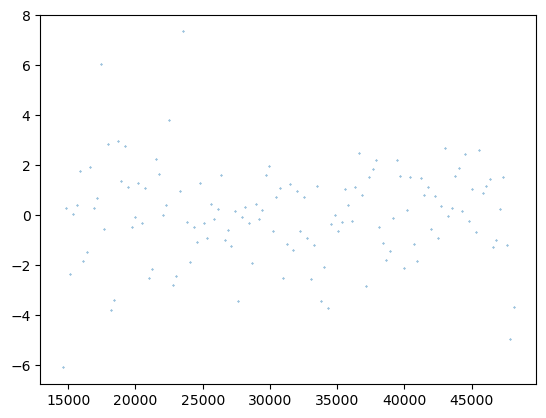

In [16]:
toplot = []

for v in x_vals:
    fvs = [i[1] for i in filter(lambda x: x[0]==v, d)]
    if len(fvs):
        toplot.append( (v,np.mean( fvs ) - np.polyval(f1, v)) )
        
plt.scatter( [i[0] for i in toplot], [i[1] for i in toplot], s=.1 )
        

/home/loganaw/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


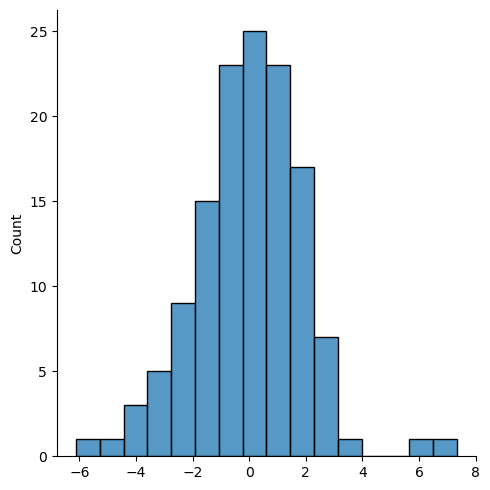

In [17]:
sns.displot( [i[1] for i in toplot] )

[ 2.12659443e-13 -3.13825399e-08 -6.94934657e-02  3.53858194e+03]


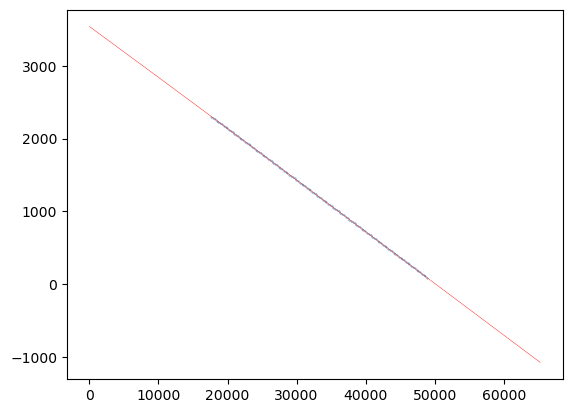

In [18]:
d = []
for k in filter(lambda x: '_ch2' in x, p.keys()):
    for x,i in zip(x_vals,sorted(p[k].keys())):
        d.append( (x, np.argmax(p[k][i]) ) )
        
minval, maxval = 17500, 49000
        
d = list(filter(lambda x: 17500 < x[0] < 49000, d))

f2 = np.polyfit( [i[0] for i in d], [i[1] for i in d], 3 )
print(f2)

plt.scatter( [i[0] for i in d], [i[1] for i in d], s=.1 )
plt.plot( x_vals, [np.polyval(f2, i) for i in x_vals], c='r', lw=.3)

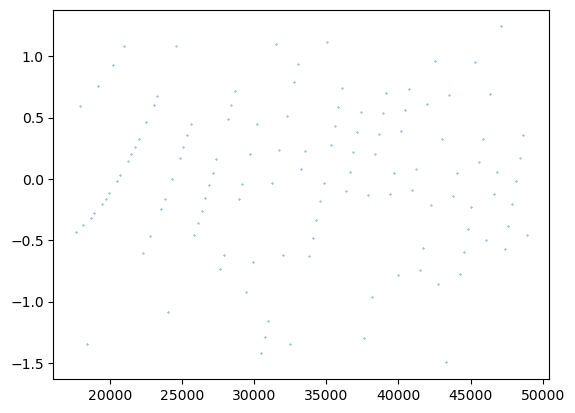

In [19]:
toplot = []

for v in x_vals:
    fvs = [i[1] for i in filter(lambda x: x[0]==v, d)]
    if len(fvs):
        toplot.append( (v,np.mean( fvs ) - np.polyval(f2, v)) )
        
plt.scatter( [i[0] for i in toplot], [i[1] for i in toplot], s=.1 )
        

/home/loganaw/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


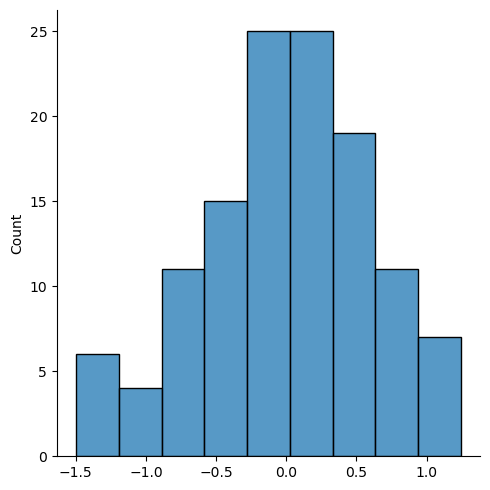

In [20]:
sns.displot( [i[1] for i in toplot] )

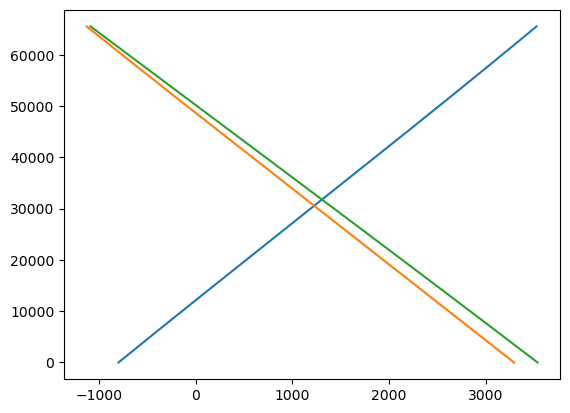

In [21]:
plt.plot( [np.polyval(f0, i) for i in range(2**16 - 1)], list(range(2**16 - 1)) )
plt.plot( [np.polyval(f1, i) for i in range(2**16 - 1)], list(range(2**16 - 1)) )
plt.plot( [np.polyval(f2, i) for i in range(2**16 - 1)], list(range(2**16 - 1)) )

In [22]:
from collections import defaultdict

In [23]:
res = {}

for si,f in enumerate([f0, f1, f2]):
    res[si] = defaultdict(lambda: [])
    
    for i,v in zip(list(range(2**16)), (np.polyval(f, i) for i in range(2**16))):
        #print(i,v)
        res[si][int(round(v))].append(i)
        
    res[si] = dict(res[si])
        
    for k in res[si].keys():
        res[si][k] = int(round(np.mean(res[si][k])))

In [24]:
[res[0][1000 + i] for i in range(5)]

[27186, 27201, 27216, 27230, 27245]

In [25]:
res = {}

for si,f in enumerate([f0, f1, f2]):
    xs = [np.polyval(f, i) for i in range(2**16 - 1)]
    ys = list(range(2**16 - 1))
    
    new_fit = np.polyfit(xs, ys, 3)
    
    res[si] = list(new_fit)

In [26]:
res

{0: [3.3782011090791607e-08,
  -0.00010580910397239383,
  15.077778798509682,
  12179.726863097421],
 1: [-1.2973028625607567e-08,
  6.798815347524547e-05,
  -14.840472324826985,
  48628.329336668765],
 2: [-8.647647752139468e-09,
  2.1915517402917492e-06,
  -14.07704204121442,
  50169.216711777124]}

In [27]:
import pickle

with open('ham_cal.p', 'wb') as f:
    pickle.dump(res, f)